#Assignment 2:
test the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson. Use: 

1) KS

2) KL or Chisq

3) AD

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#generate the distribution
dist_n = np.random.randn(1000)

#test ad and ks. those are easy
print "normal on normal", scipy.stats.kstest(dist_n,'norm')
print "normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print "" 

dist_p = np.random.poisson(1, 1000)

print "poisson on normal", scipy.stats.kstest(dist_p,'norm')
print "poisson on normal", scipy.stats.anderson(dist_p, dist='norm')

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold

##what is this threshold I am saving??

normal on normal (0.021871263501076488, 0.72512004341819891)
normal on normal (0.31443866284109845, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

poisson on normal (0.5, 0.0)
poisson on normal (56.690073114063125, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
[ 1.088]


###Comment
The threshold value is the critical value of anderson test when the confidence level = 0.01

###Null Hypothesis for KS: Two samples come from the same parent distribution.
###Null Hypothesis for AD: A sample is drawn from a population that follows a particular distribution.

In [3]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

In [4]:
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])
print "normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))  
print "poisson on normal", scipy.stats.entropy(distpdf_p, scipy.stats.norm.pdf(bincenters_p)) 

normal on normal 0.00362769687405
poisson on normal 0.553758318964


### Comment
For poisson on normal, the value of entropy is very high, thus we reject the null hypothesis that there is no difference between the two distributions.

# Part I: Test the difference between a Binomial distribution and a Gaussian distribution 

In [5]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)
p=0.5
for i,n in enumerate(narray):
    p=0.1 
    dist = np.random.binomial(n, p, 1000) 
 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    mybins=np.linspace(min(dist),max(dist), 10)
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    

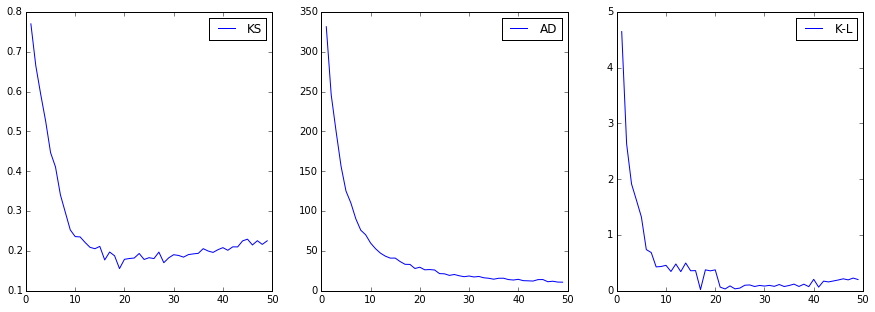

In [6]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')
pl.legend()

##Figure Caption: Test Statistics Value vs. Population Means
From left to right, the three plots above show the relationship of test statistics value (y-axix) versus the polulation mean (x-axis) for KS test, Anderson Darling test and KL divergence test seperately. We could observe that for all there plots, as the population means increase, the test statistics values decrease, indicating that the binomial distribution becomes more like normal distribution.

#Part II: Test the difference between a Poisson distribution and a Gaussian distribution

In [7]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

for i,n in enumerate(narray):
    p=0.1 
    dist2 = np.random.poisson(n, 1000) 
    ks_b[i] = scipy.stats.kstest(dist2, mynorm, args=(n, n))[0]
    ad_b[i] = scipy.stats.anderson(dist2, dist='norm')[0]
    
    mybins = np.linspace(min(dist2),max(dist2), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist2, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

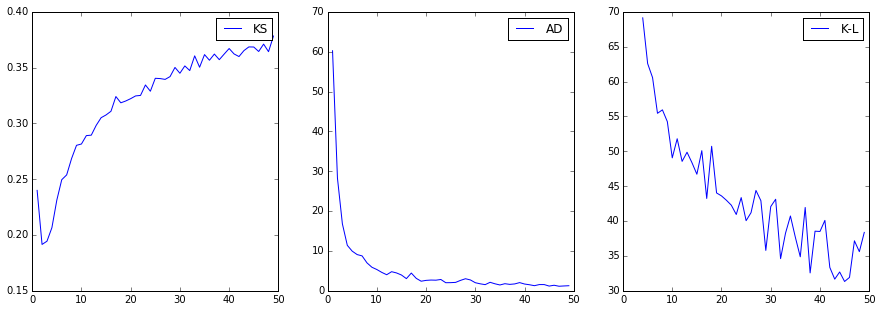

In [8]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

##Figure Caption: Test Statistics Value vs. Population Means
From left to right, the three plots above show the relationship of test statistics value (y-axix) versus the polulation mean (x-axis) for KS test, Anderson Darling test and KL divergence test seperately. We could observe that for the AD and KL plots, as the population means increase, the test statistics values decrease, indicating that the possion distribution becomes more like normal distribution.

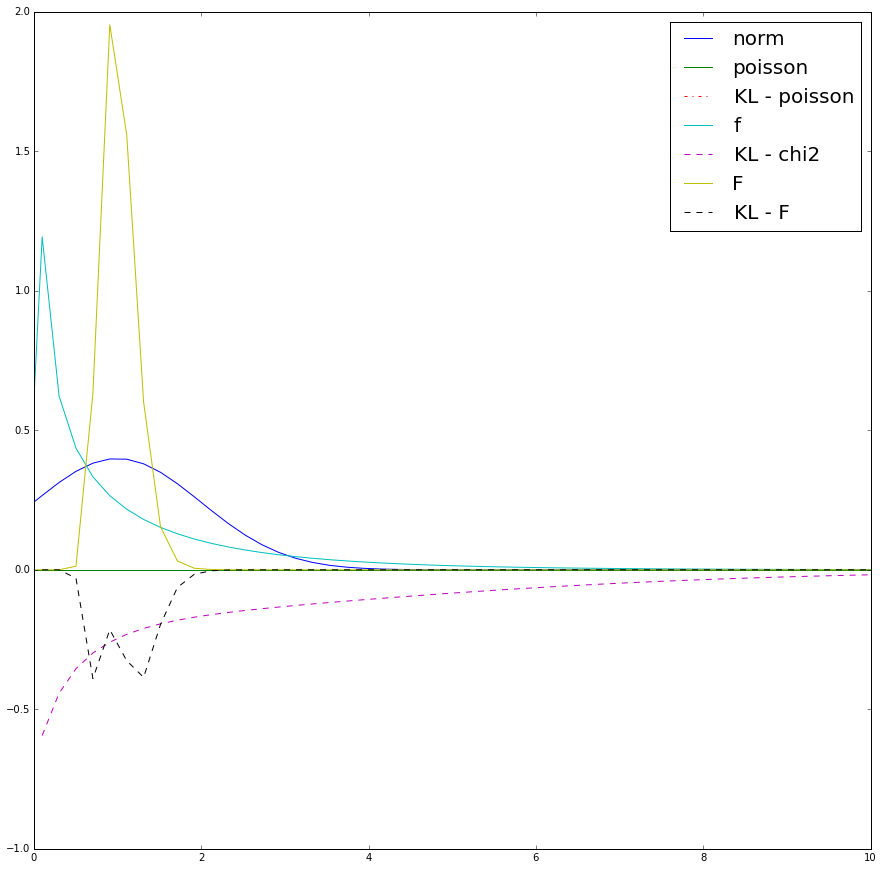

In [9]:
pl.figure(figsize=(15,15))

p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x-mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu)* np.log10(q(x, mu)) + p(x, mu) *np.log10(p(x, mu))

def model(x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

x=np.linspace(-10,10,100)
pl.plot(x, q(x,1), label='norm')
pl.plot(x, p(x,1), label='poisson')
pl.plot(x, Dkl(x, 1, p), '-.', label = 'KL - poisson')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))


pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')



#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))


pl.plot(x, f(x,1), label='F')
pl.plot(x,Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(0,10)
pl.legend( fontsize = 20)